<a href="https://colab.research.google.com/github/Amistad755/vis/blob/main/surprise_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PS 1:

###Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###Loading Datasets

In [ ]:
poverty_df = pd.read_excel('https://github.com/Amistad755/vis/raw/main/New%20Jersey_Poverty%20in%20County_C.xlsx')
unemp_df = pd.read_excel('https://github.com/Amistad755/vis/raw/main/New%20Jersey%20Unemployement_County_B.xlsx')
drug_df = pd.read_excel('https://github.com/Amistad755/vis/raw/main/Drug_Usage_New%20Jersey%20County_A.xlsx')
police_df = pd.read_excel('https://github.com/Amistad755/vis/raw/main/Police_Officers_County_NJ.xlsx')
income_df = pd.read_excel('https://github.com/Amistad755/vis/raw/main/TotIncTaxCounty%20(1)%20(1).xlsx')


In [ ]:
poverty_df.head(5)

,COUNTY,POPULATION,POVERTY
0,ATLANTIC,261002,30757
1,BERGEN,886798,51639
2,BURLINGTON,435105,23840
3,CAMDEN,505340,56608
4,CAPE MAY,95686,8776


In [ ]:
unemp_df.head(5)

,COUNTY,POPULATION,UNEMP
0,ATLANTIC,261002,6300
1,BERGEN,886798,16900
2,BURLINGTON,435105,8200
3,CAMDEN,505340,10900
4,CAPE MAY,95686,3100


In [ ]:
drug_df.head(5)

,County,Drug_Total_Consumption
0,Atlantic,9
1,Bergen,4
2,Burlington,5
3,Camden,9
4,Cape May,3


###Descriptive Statistics

####Mean, Median, Mode, Standard Deviation

In [ ]:
poverty_df.describe()

,POPULATION,POVERTY
count,21.000000,21.000000
mean,406871.571429,37046.095238
std,245652.606886,29535.753305
min,65115.000000,4947.000000
25%,148398.000000,11235.000000
50%,435105.000000,30757.000000
75%,561988.000000,51639.000000
max,886798.000000,110725.000000


In [ ]:
unemp_df.describe()

,POPULATION,UNEMP
count,21.000000,21.000000
mean,406871.571429,8352.380952
std,245652.606886,5009.952001
min,65115.000000,1400.000000
25%,148398.000000,3500.000000
50%,435105.000000,8200.000000
75%,561988.000000,11500.000000
max,886798.000000,17500.000000


In [ ]:
drug_df.describe()

,Drug_Total_Consumption
count,21.000000
mean,4.666667
std,2.816617
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,10.000000


####Histograms

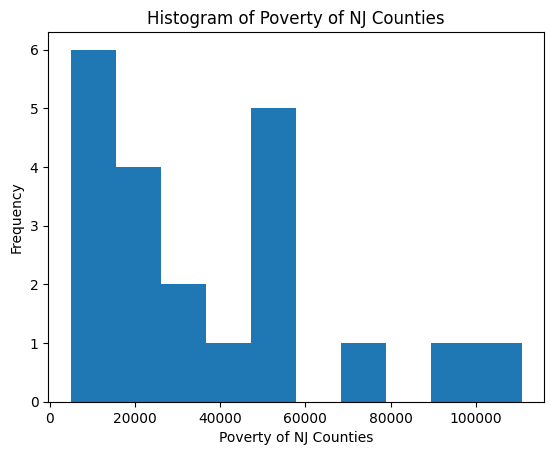

In [ ]:
plt.hist(poverty_df['POVERTY'], bins=10)
plt.xlabel('Poverty of NJ Counties')
plt.ylabel('Frequency')
plt.title('Histogram of Poverty of NJ Counties')
plt.show()

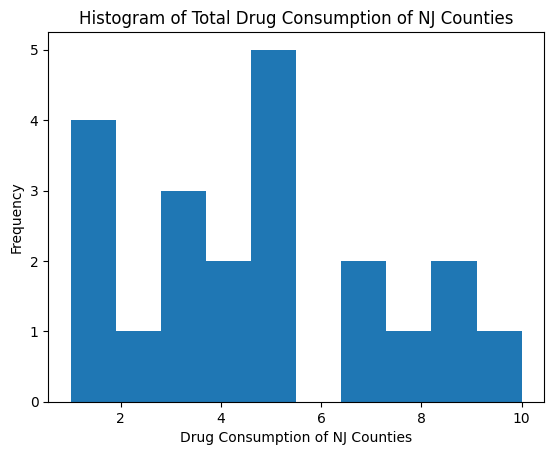

In [ ]:
plt.hist(drug_df['Drug_Total_Consumption'], bins=10)
plt.xlabel('Drug Consumption of NJ Counties')
plt.ylabel('Frequency')
plt.title('Histogram of Total Drug Consumption of NJ Counties')
plt.show()

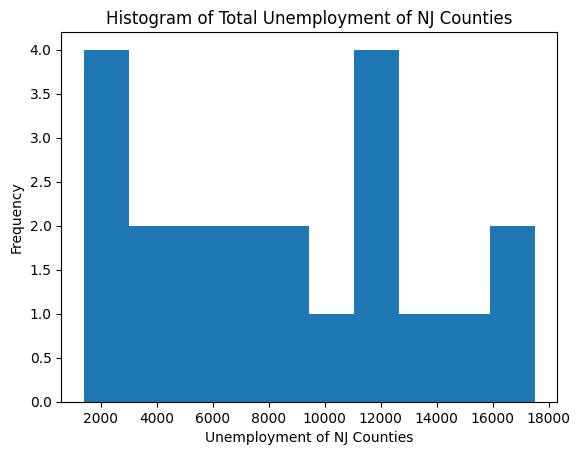

In [ ]:
plt.hist(unemp_df['UNEMP'], bins=10)
plt.xlabel('Unemployment of NJ Counties')
plt.ylabel('Frequency')
plt.title('Histogram of Total Unemployment of NJ Counties')
plt.show()

####Box Plots

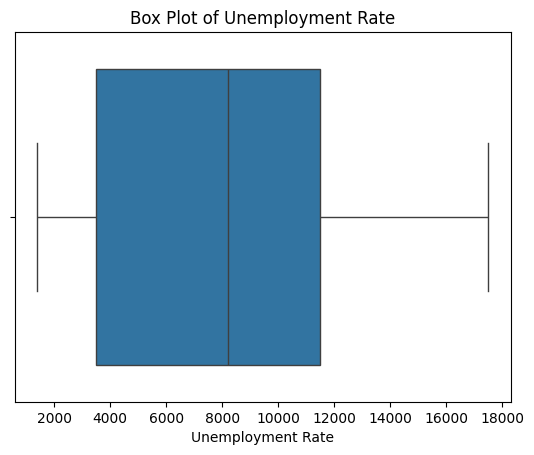

In [ ]:
sns.boxplot(x=unemp_df['UNEMP'])
plt.xlabel('Unemployment Rate')
plt.title('Box Plot of Unemployment Rate')
plt.show()

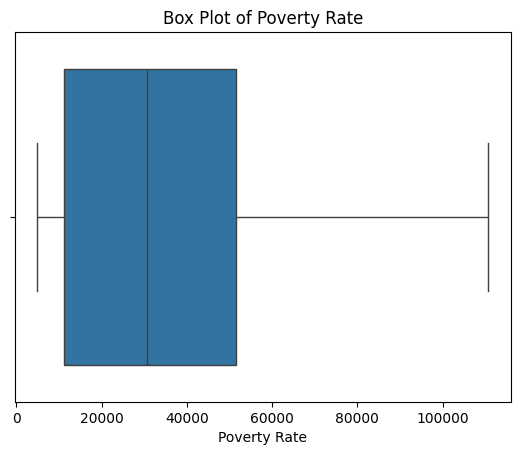

In [ ]:
sns.boxplot(x=poverty_df['POVERTY'])
plt.xlabel('Poverty Rate')
plt.title('Box Plot of Poverty Rate')
plt.show()

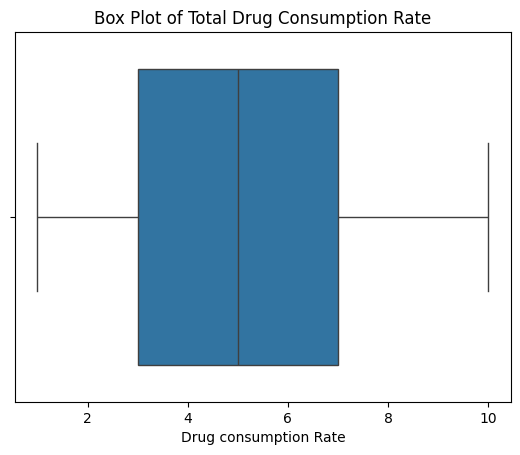

In [ ]:
sns.boxplot(x=drug_df['Drug_Total_Consumption'])
plt.xlabel('Drug consumption Rate')
plt.title('Box Plot of Total Drug Consumption Rate')
plt.show()

####Hypothesis

##PS 2:

####Merging Datasets

In [ ]:
merge_df1 = pd.merge(poverty_df, unemp_df, on='COUNTY')

In [ ]:
merge_df1

,COUNTY,POPULATION_x,POVERTY,POPULATION_y,UNEMP
0,ATLANTIC,261002,30757,261002,6300
1,BERGEN,886798,51639,886798,16900
2,BURLINGTON,435105,23840,435105,8200
3,CAMDEN,505340,56608,505340,10900
4,CAPE MAY,95686,8776,95686,3100
5,CUMBERLAND,144832,22519,144832,3500
6,ESSEX,760726,110725,760726,17500
7,GLOUCESTER,280462,20009,280462,5900
8,HUDSON,615220,93152,615220,13700
9,HUNTERDON,124603,4947,124603,2000


In [ ]:
drug_df.columns = drug_df.columns.str.upper()
for col in drug_df.columns:
    drug_df['COUNTY'] = drug_df['COUNTY'].astype(str).str.upper()

In [ ]:
drug_df

,COUNTY,DRUG_TOTAL_CONSUMPTION
0,ATLANTIC,9
1,BERGEN,4
2,BURLINGTON,5
3,CAMDEN,9
4,CAPE MAY,3
5,CUMBERLAND,3
6,ESSEX,10
7,GLOUCESTER,5
8,HUDSON,5
9,HUNTERDON,1


In [ ]:
merge_df2 = pd.merge(merge_df1, drug_df, on = 'COUNTY')

In [ ]:
merge_df2

,COUNTY,POPULATION_x,POVERTY,POPULATION_y,UNEMP,DRUG_TOTAL_CONSUMPTION
0,ATLANTIC,261002,30757,261002,6300,9
1,BERGEN,886798,51639,886798,16900,4
2,BURLINGTON,435105,23840,435105,8200,5
3,CAMDEN,505340,56608,505340,10900,9
4,CAPE MAY,95686,8776,95686,3100,3
5,CUMBERLAND,144832,22519,144832,3500,3
6,ESSEX,760726,110725,760726,17500,10
7,GLOUCESTER,280462,20009,280462,5900,5
8,HUDSON,615220,93152,615220,13700,5
9,HUNTERDON,124603,4947,124603,2000,1


####Renaming Column and Droppping Column

In [ ]:
merge_df2.rename(columns={'POPULATION_x': 'POPULATION'}, inplace=True)

In [ ]:
merge_df2.drop('POPULATION_y', axis=1, inplace=True)

In [ ]:
merge_df2

,COUNTY,POPULATION,POVERTY,UNEMP,DRUG_TOTAL_CONSUMPTION
0,ATLANTIC,261002,30757,6300,9
1,BERGEN,886798,51639,16900,4
2,BURLINGTON,435105,23840,8200,5
3,CAMDEN,505340,56608,10900,9
4,CAPE MAY,95686,8776,3100,3
5,CUMBERLAND,144832,22519,3500,3
6,ESSEX,760726,110725,17500,10
7,GLOUCESTER,280462,20009,5900,5
8,HUDSON,615220,93152,13700,5
9,HUNTERDON,124603,4947,2000,1


####Hypothesis

##PS3

In [ ]:
police_df.head(40)

,County,Police Officers,Civilians,Total Police Employees
0,Atlantic,786,2333000,1049
1,Bergen,2122,271949,2434
2,Burlington,727,44781,810
3,Camden,1329,71773,1492
4,Cape May,324,2834,411
5,Cumberland,266,153627,317
6,Essex,2527,854917,3051
7,Gloucester,566,304477,614
8,Hudson,1853,702463,2552
9,Hunterdon,164,129924,178


In [ ]:
police_df.columns = police_df.columns.str.upper()
for col in police_df.columns:
    police_df['COUNTY'] = drug_df['COUNTY'].astype(str).str.upper()
police_df.head()

,COUNTY,POLICE OFFICERS,CIVILIANS,TOTAL POLICE EMPLOYEES
0,ATLANTIC,786,2333000,1049
1,BERGEN,2122,271949,2434
2,BURLINGTON,727,44781,810
3,CAMDEN,1329,71773,1492
4,CAPE MAY,324,2834,411


In [ ]:
merge_df3 = pd.merge(merge_df2, police_df, on='COUNTY')

In [ ]:
merge_df3.head()

,COUNTY,POPULATION,POVERTY,UNEMP,DRUG_TOTAL_CONSUMPTION,POLICE OFFICERS,CIVILIANS,TOTAL POLICE EMPLOYEES
0,ATLANTIC,261002,30757,6300,9,786,2333000,1049
1,BERGEN,886798,51639,16900,4,2122,271949,2434
2,BURLINGTON,435105,23840,8200,5,727,44781,810
3,CAMDEN,505340,56608,10900,9,1329,71773,1492
4,CAPE MAY,95686,8776,3100,3,324,2834,411


In [ ]:
income_df['COUNTY ']

0       ATLANTIC 
1         BERGEN 
2     BURLINGTON 
3         CAMDEN 
4       CAPE MAY 
5     CUMBERLAND 
6          ESSEX 
7     GLOUCESTER 
8         HUDSON 
9      HUNTERDON 
10        MERCER 
11     MIDDLESEX 
12      MONMOUTH 
13        MORRIS 
14         OCEAN 
15       PASSAIC 
16         SALEM 
17      SOMERSET 
18        SUSSEX 
19         UNION 
20        WARREN 
Name: COUNTY , dtype: object

In [ ]:
income_df.rename(columns={'COUNTY ': 'COUNTY'}, inplace=True)

In [ ]:
income_df['COUNTY'] = income_df['COUNTY'].str.strip()

In [ ]:
merge_df4 = pd.merge(merge_df3, income_df, on="COUNTY")

In [ ]:
merge_df4

,COUNTY,POPULATION,POVERTY,UNEMP,DRUG_TOTAL_CONSUMPTION,POLICE OFFICERS,CIVILIANS,TOTAL POLICE EMPLOYEES,CODE,TOTAL_STATE_FEE,TOTAL_MUNI_TAX,TOTAL_STATE/MUNI
0,ATLANTIC,261002,30757,6300,9,786,2333000,1049,1,740146.25,209485.40,949631.65
1,BERGEN,886798,51639,16900,4,2122,271949,2434,2,1417081.07,849275.20,2266356.27
2,BURLINGTON,435105,23840,8200,5,727,44781,810,3,597149.02,355146.72,952295.74
3,CAMDEN,505340,56608,10900,9,1329,71773,1492,4,297085.46,164325.99,461411.45
4,CAPE MAY,95686,8776,3100,3,324,2834,411,5,2618516.90,679300.15,3297817.05
5,CUMBERLAND,144832,22519,3500,3,266,153627,317,6,110336.86,65462.71,175799.57
6,ESSEX,760726,110725,17500,10,2527,854917,3051,7,530043.83,231989.04,762032.87
7,GLOUCESTER,280462,20009,5900,5,566,304477,614,8,215273.53,115935.80,331209.33
8,HUDSON,615220,93152,13700,5,1853,702463,2552,9,917080.23,447548.95,1364629.18
9,HUNTERDON,124603,4947,2000,1,164,129924,178,10,125058.53,74406.25,199464.78


####Bar Charts

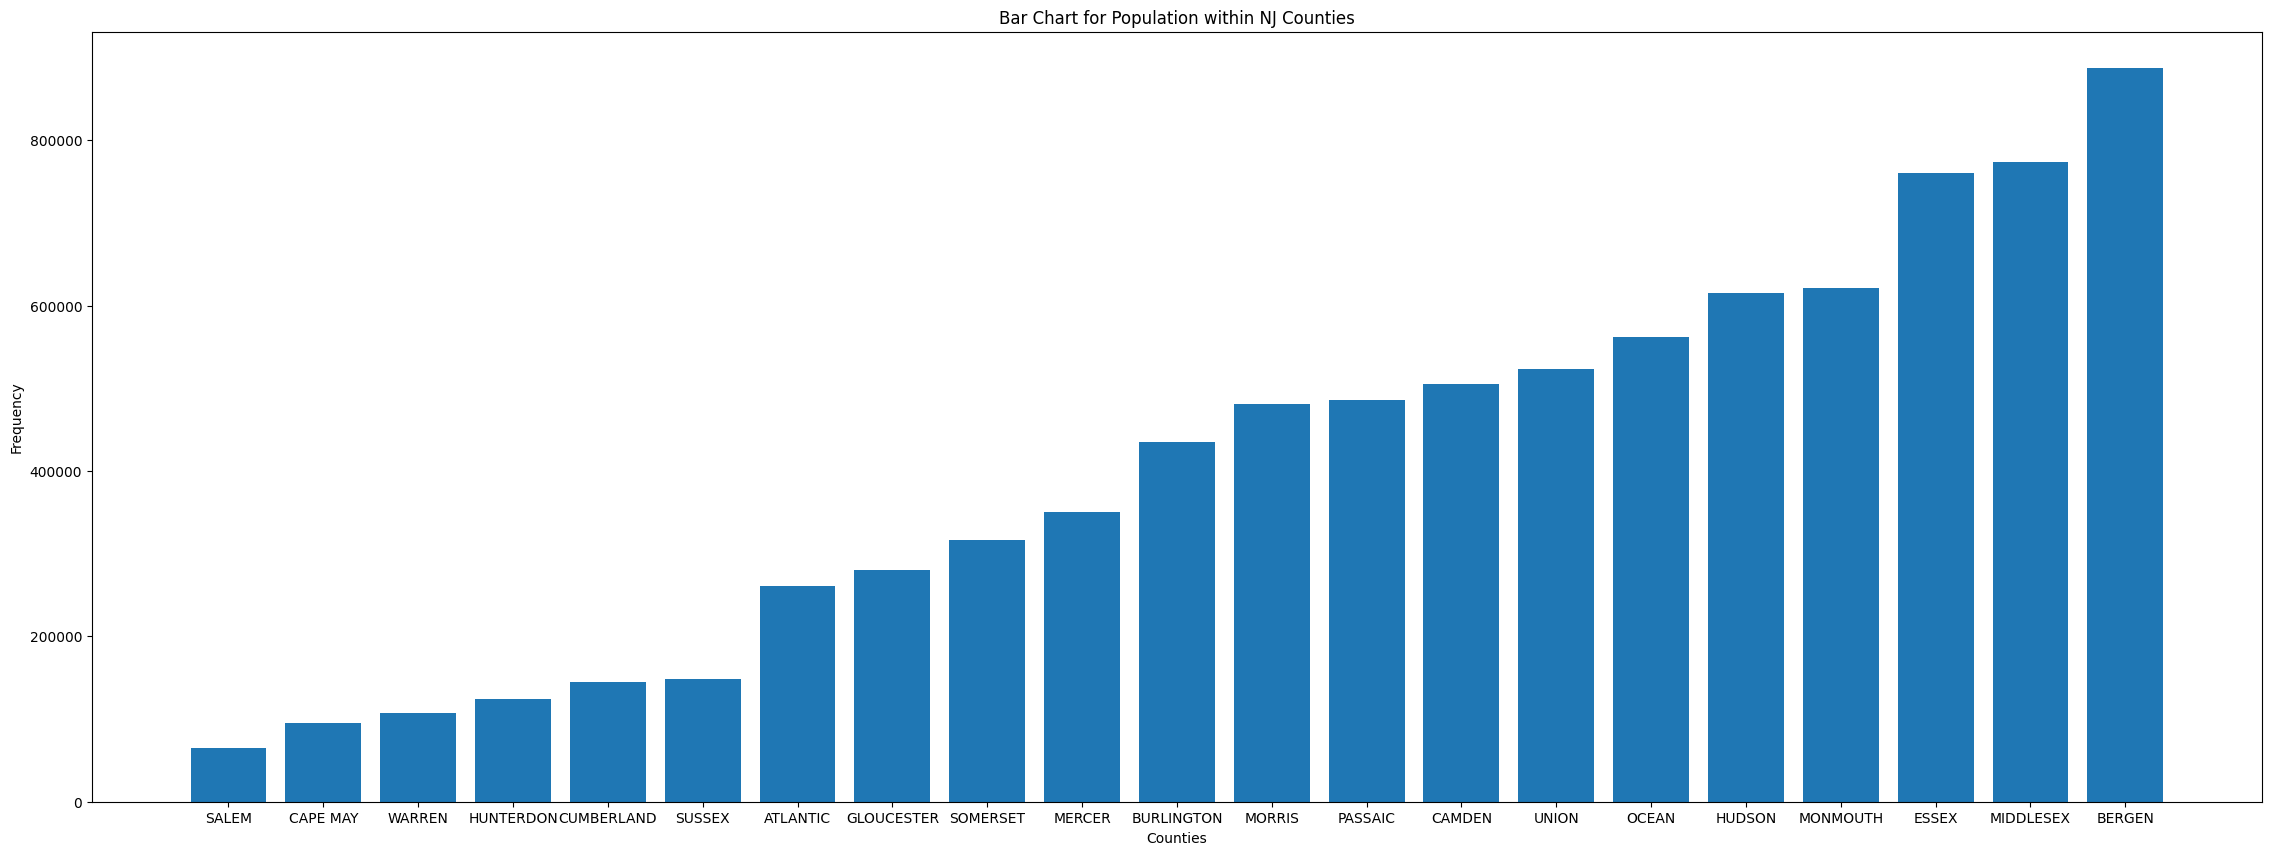

In [ ]:
plt.figure(figsize=(28, 10))
merge_df4.sort_values(by="POPULATION",inplace = True)
plt.bar(merge_df4['COUNTY'], merge_df4['POPULATION'])
plt.xlabel('Counties')
plt.ylabel('Frequency')
plt.title('Bar Chart for Population within NJ Counties')
plt.show()

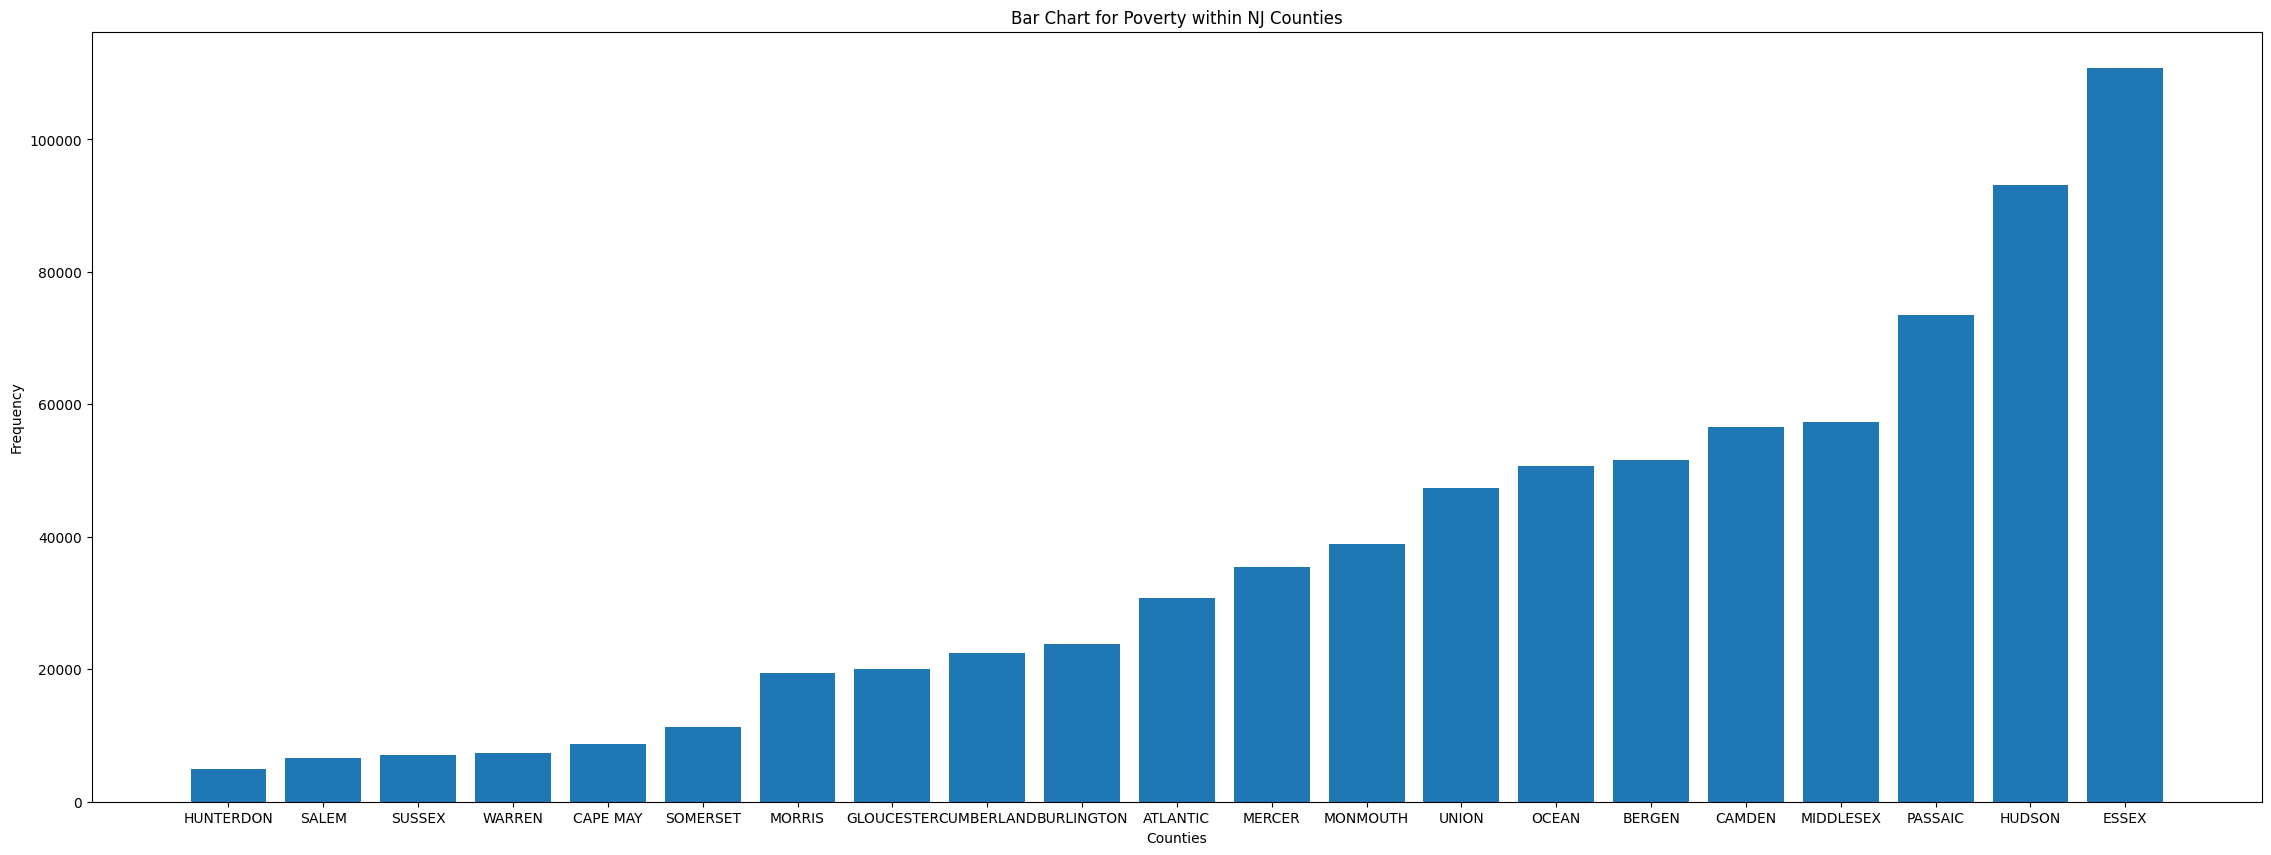

In [ ]:
plt.figure(figsize=(28, 10))
merge_df4.sort_values(by="POVERTY",inplace = True)
plt.bar(merge_df4['COUNTY'], merge_df4['POVERTY'])
plt.xlabel('Counties')
plt.ylabel('Frequency')
plt.title('Bar Chart for Poverty within NJ Counties')
plt.show()

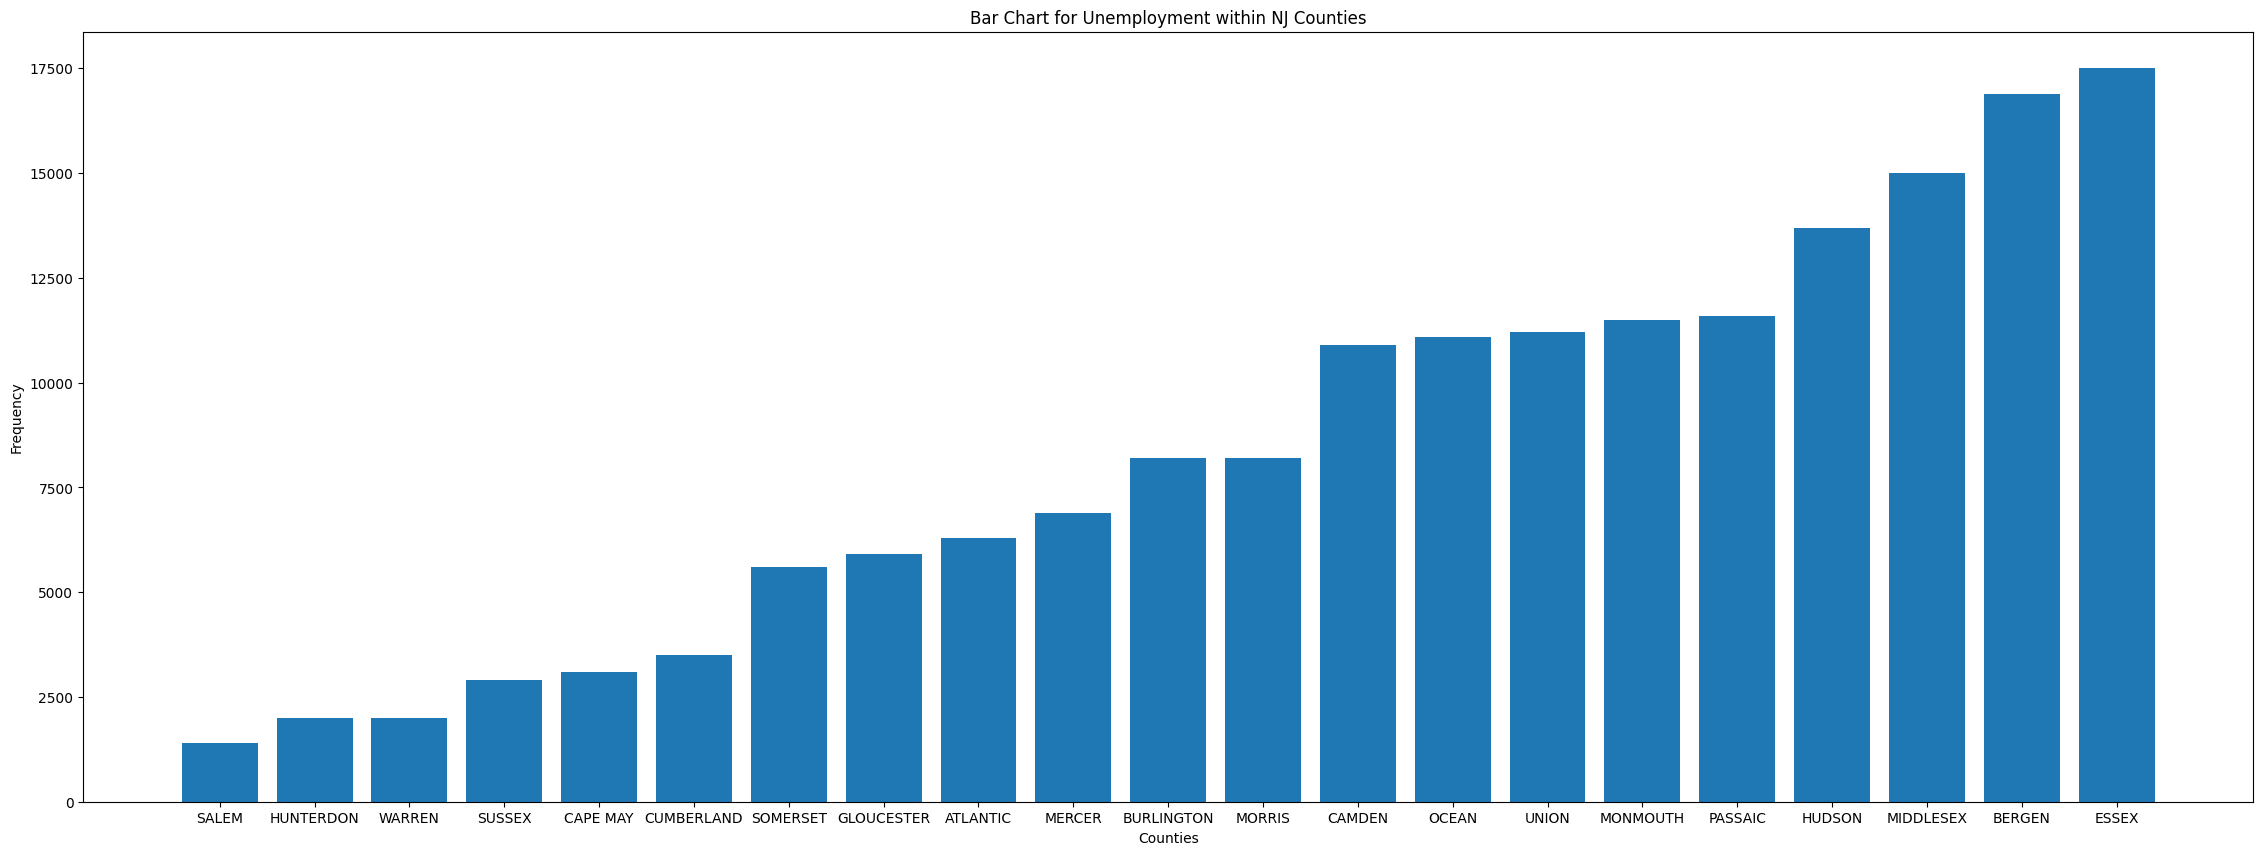

In [ ]:
plt.figure(figsize=(28, 10))
merge_df4.sort_values(by="UNEMP",inplace = True)
plt.bar(merge_df4['COUNTY'], merge_df4['UNEMP'])
plt.xlabel('Counties')
plt.ylabel('Frequency')
plt.title('Bar Chart for Unemployment within NJ Counties')
plt.show()

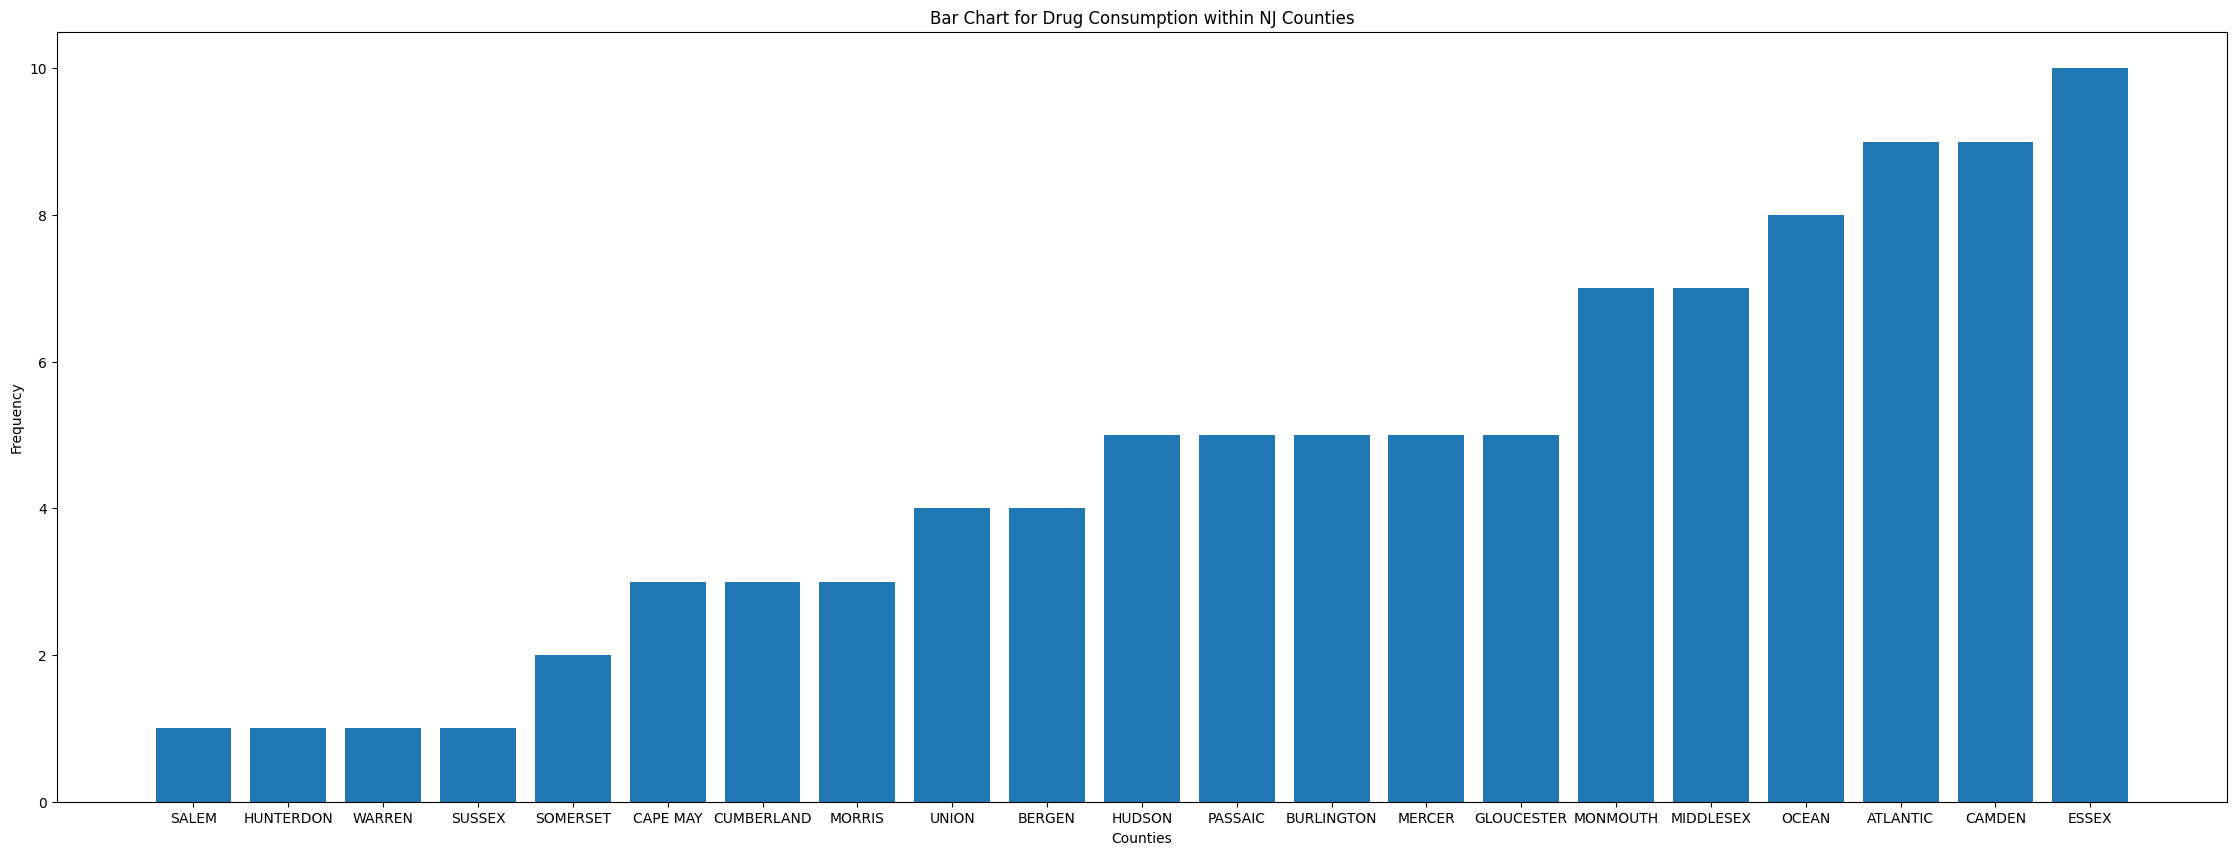

In [ ]:
plt.figure(figsize=(28, 10))
merge_df4.sort_values(by="DRUG_TOTAL_CONSUMPTION",inplace = True)
plt.bar(merge_df4['COUNTY'], merge_df4['DRUG_TOTAL_CONSUMPTION'])
plt.xlabel('Counties')
plt.ylabel('Frequency')
plt.title('Bar Chart for Drug Consumption within NJ Counties')
plt.show()

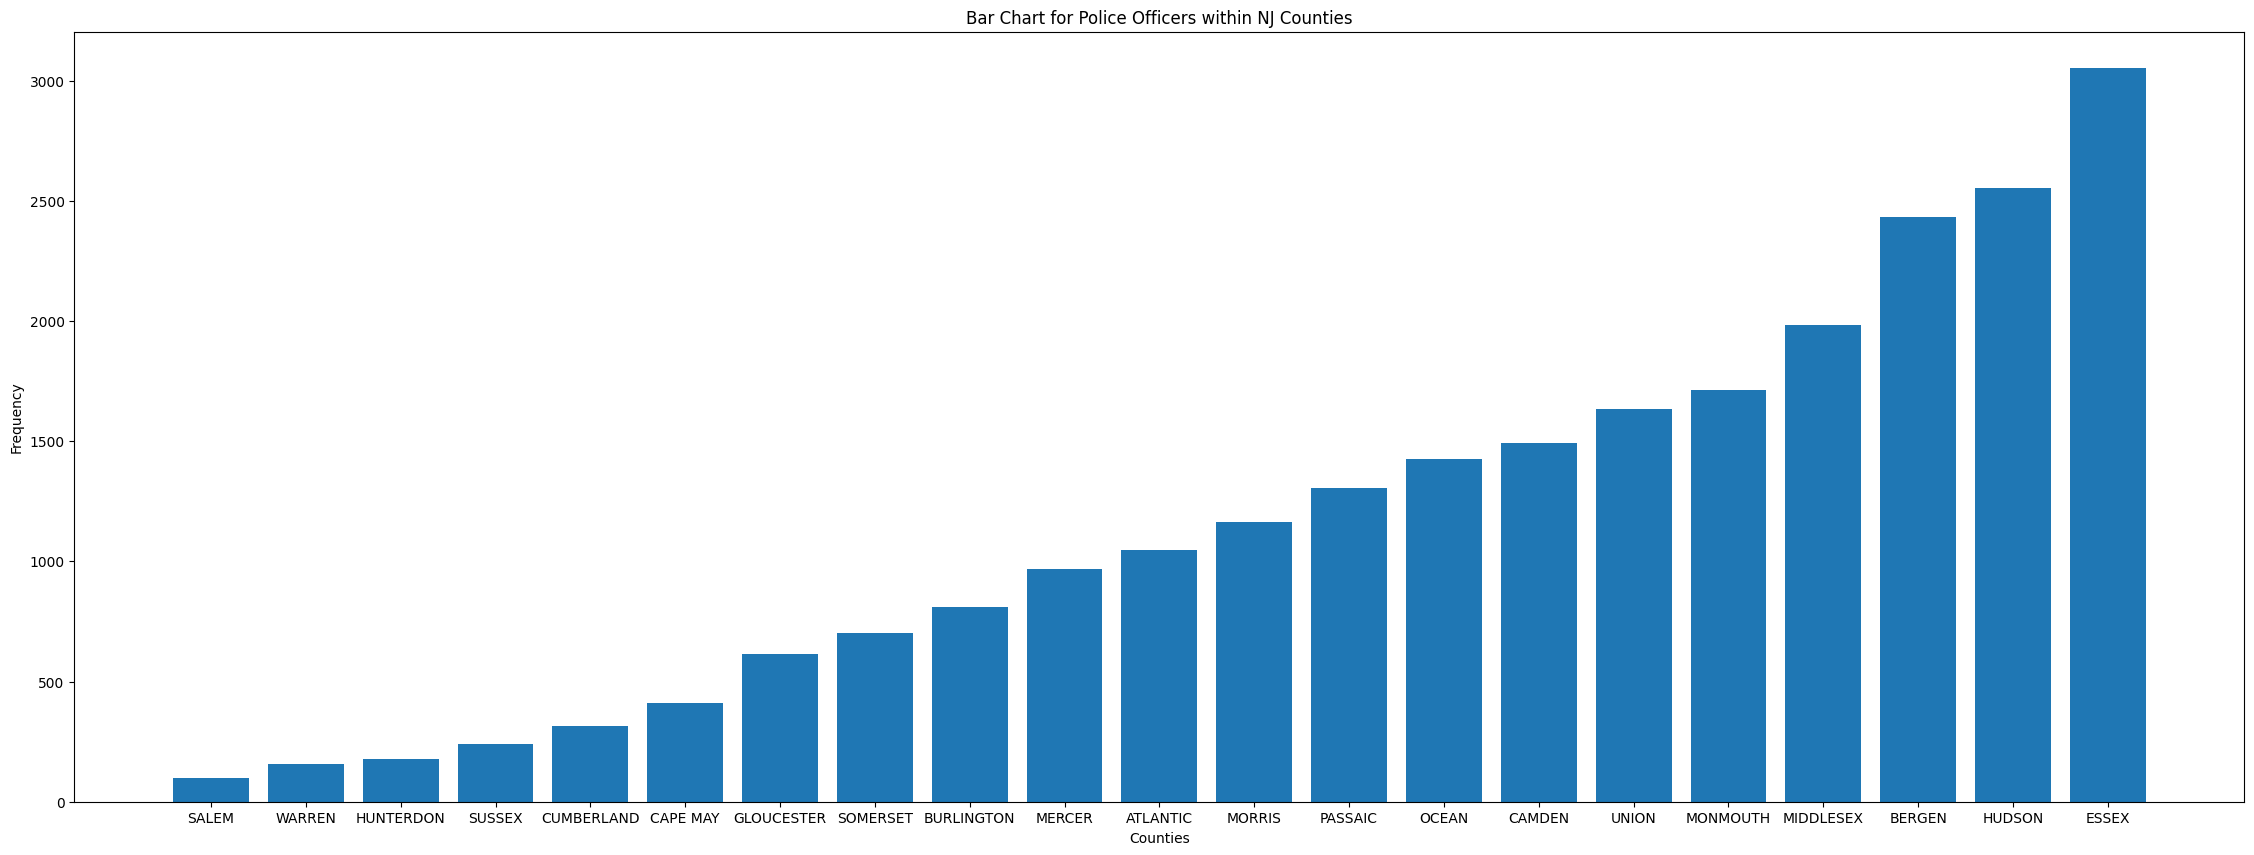

In [ ]:
plt.figure(figsize=(28, 10))
merge_df4.sort_values(by="TOTAL POLICE EMPLOYEES",inplace = True)
plt.bar(merge_df4['COUNTY'], merge_df4['TOTAL POLICE EMPLOYEES'])
plt.xlabel('Counties')
plt.ylabel('Frequency')
plt.title('Bar Chart for Police Officers within NJ Counties')
plt.show()

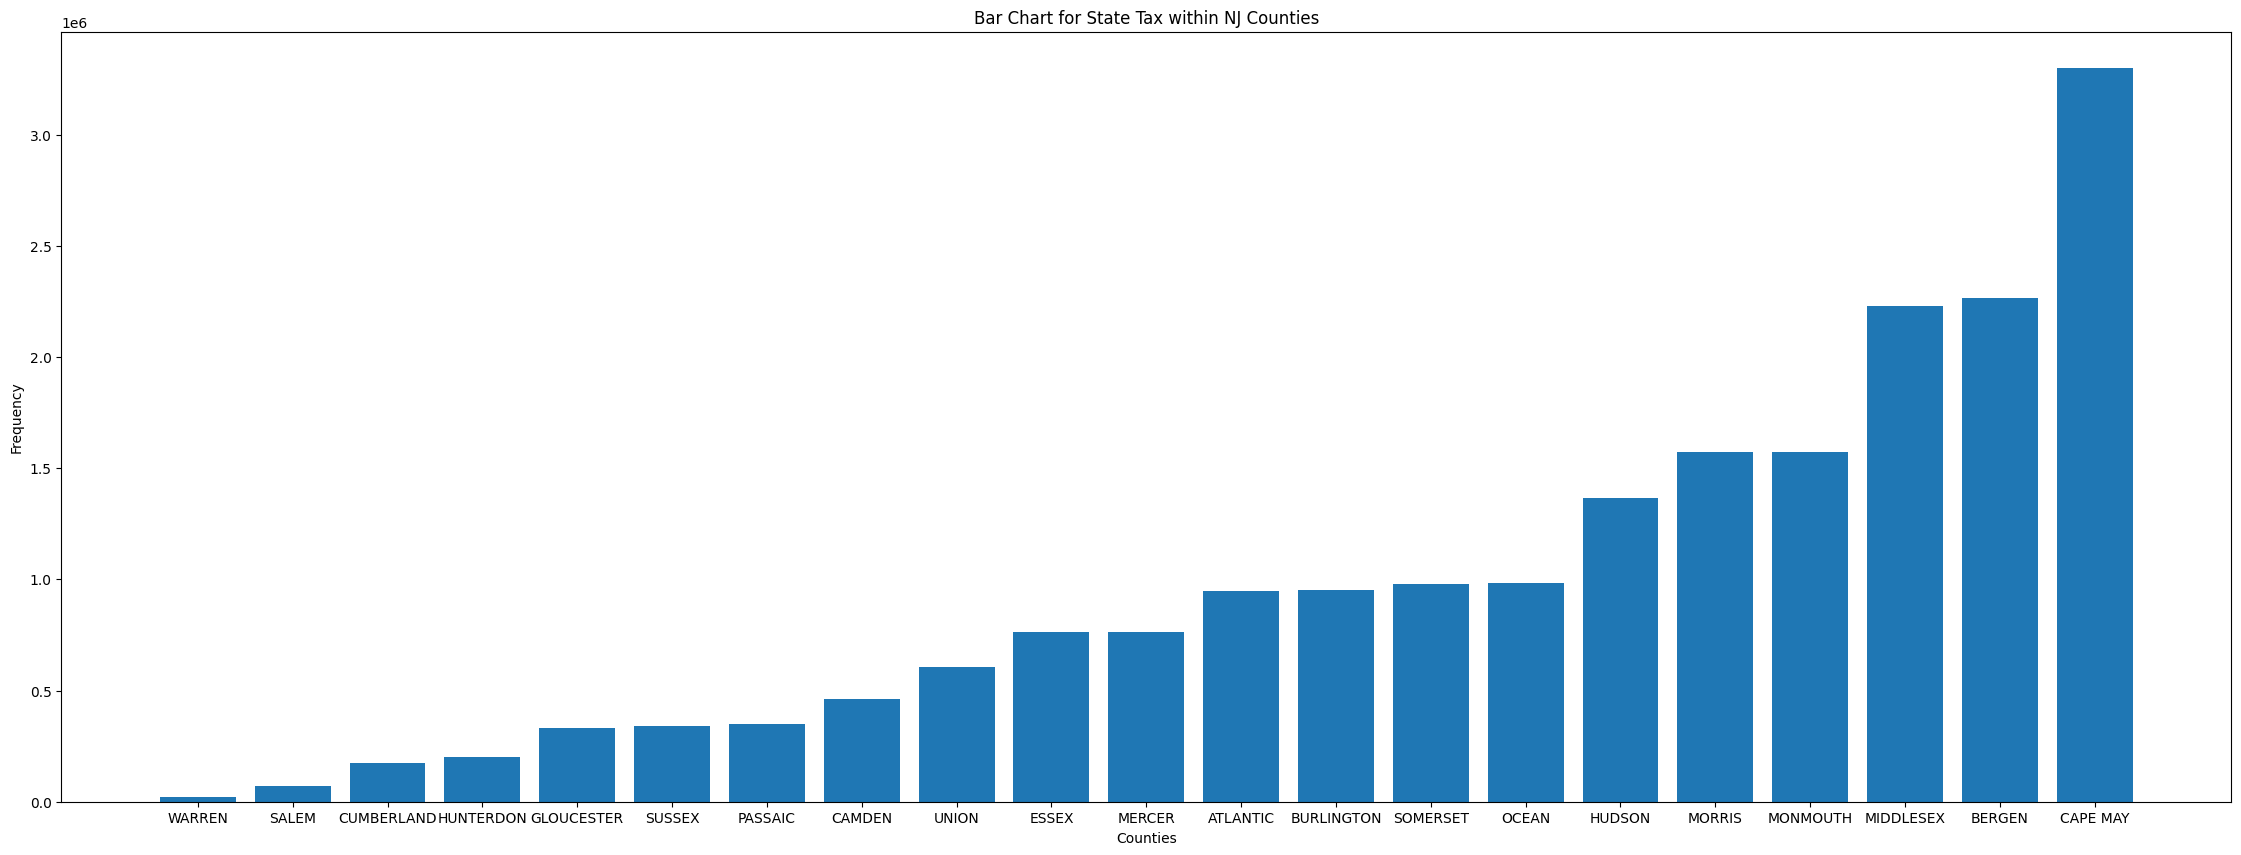

In [ ]:
plt.figure(figsize=(28, 10))
merge_df4.sort_values(by="TOTAL_STATE/MUNI",inplace = True)
plt.bar(merge_df4['COUNTY'], merge_df4['TOTAL_STATE/MUNI'])
plt.xlabel('Counties')
plt.ylabel('Frequency')
plt.title('Bar Chart for State Tax within NJ Counties')
plt.show()

####Scatter Plot

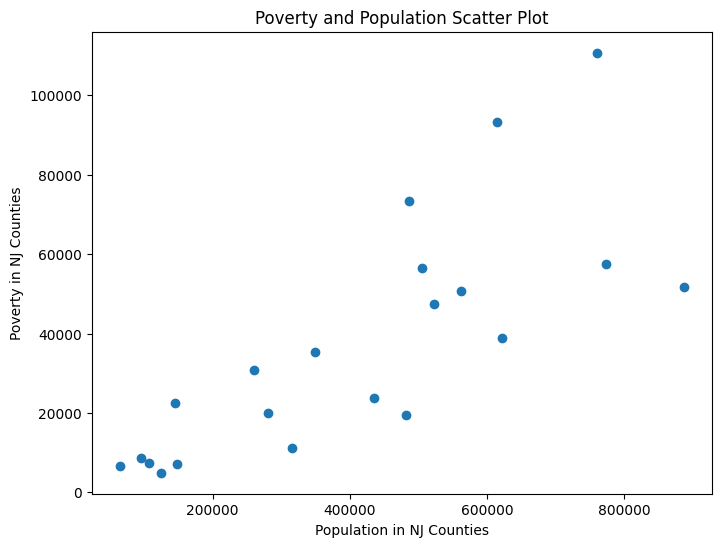

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merge_df4['POPULATION'], merge_df4['POVERTY'])
plt.xlabel('Population in NJ Counties')
plt.ylabel('Poverty in NJ Counties')
plt.title('Poverty and Population Scatter Plot')
plt.show()

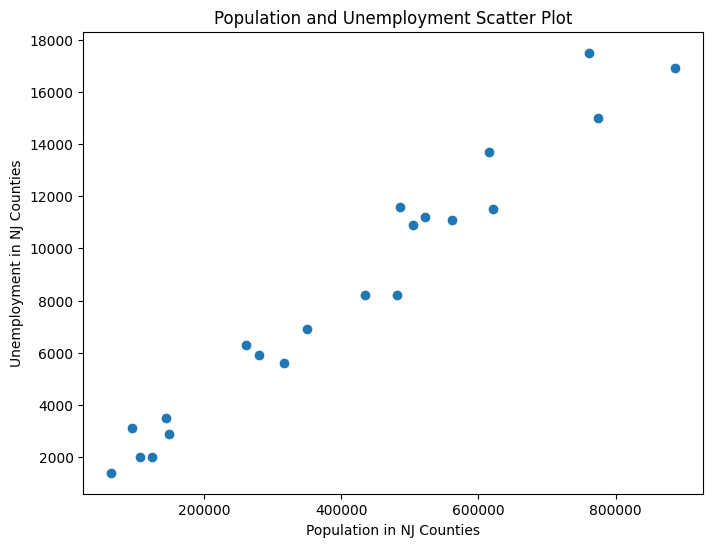

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merge_df4['POPULATION'], merge_df4['UNEMP'])
plt.xlabel('Population in NJ Counties')
plt.ylabel('Unemployment in NJ Counties')
plt.title('Population and Unemployment Scatter Plot')
plt.show()

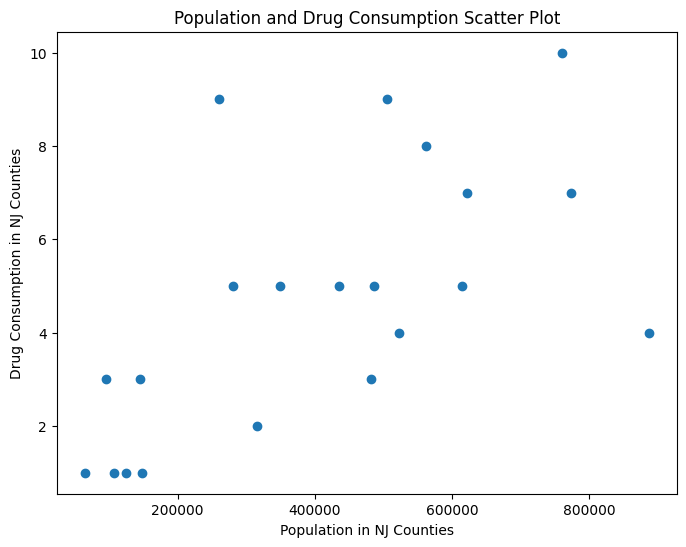

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merge_df4['POPULATION'], merge_df4['DRUG_TOTAL_CONSUMPTION'])
plt.xlabel('Population in NJ Counties')
plt.ylabel('Drug Consumption in NJ Counties')
plt.title('Population and Drug Consumption Scatter Plot')
plt.show()

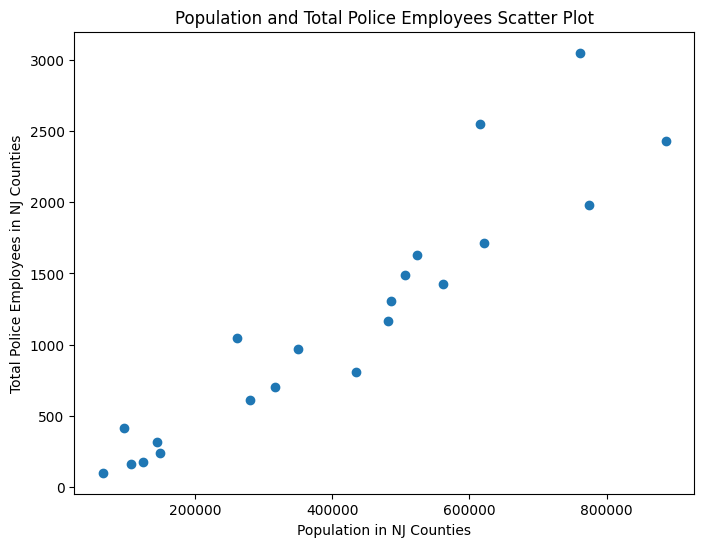

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merge_df4['POPULATION'], merge_df4['TOTAL POLICE EMPLOYEES'])
plt.xlabel('Population in NJ Counties')
plt.ylabel('Total Police Employees in NJ Counties')
plt.title('Population and Total Police Employees Scatter Plot')
plt.show()

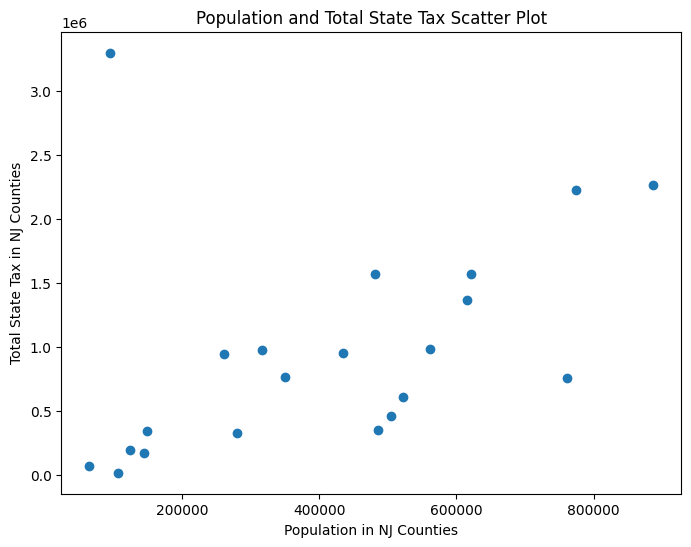

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(merge_df4['POPULATION'], merge_df4['TOTAL_STATE/MUNI'])
plt.xlabel('Population in NJ Counties')
plt.ylabel('Total State Tax in NJ Counties')
plt.title('Population and Total State Tax Scatter Plot')
plt.show()

####Correlation Plot

In [ ]:
corr_df = merge_df4[['DRUG_TOTAL_CONSUMPTION','UNEMP','POVERTY','TOTAL_STATE/MUNI','TOTAL POLICE EMPLOYEES']]

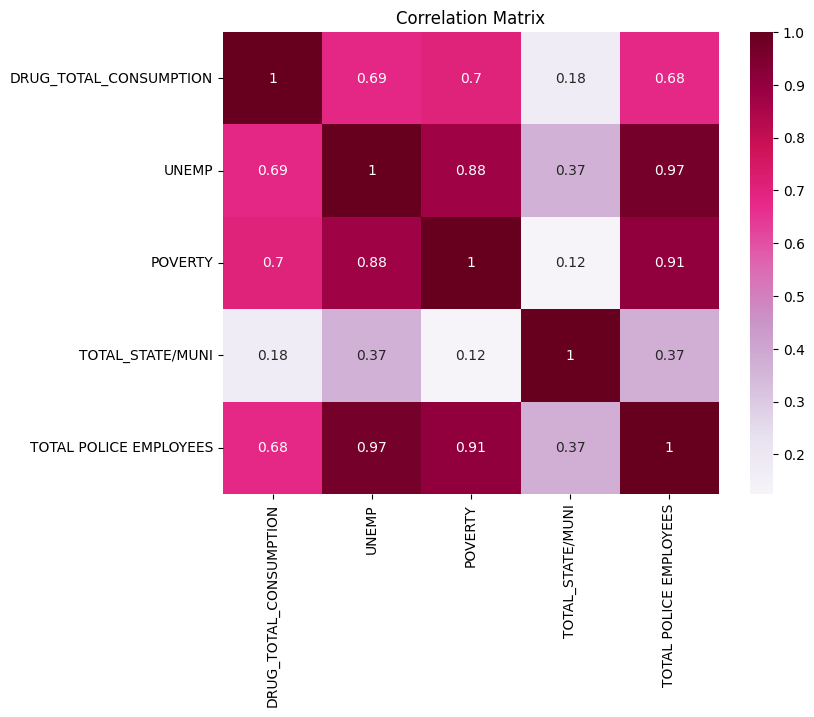

In [ ]:
correlation_matrix = corr_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd')
plt.title('Correlation Matrix')
plt.show()

1) There is a strong relationship between drugs, poverty and unemployment.
2)	The positive correlation between population size and the number of total police employees suggests that the population increases there is a need to increase public safety.
3)	The positive correlation between population size and unemployment rates suggests that as more people come in the area, the job market becomes saturated, leading to higher unemployment.


####Voilon Plot

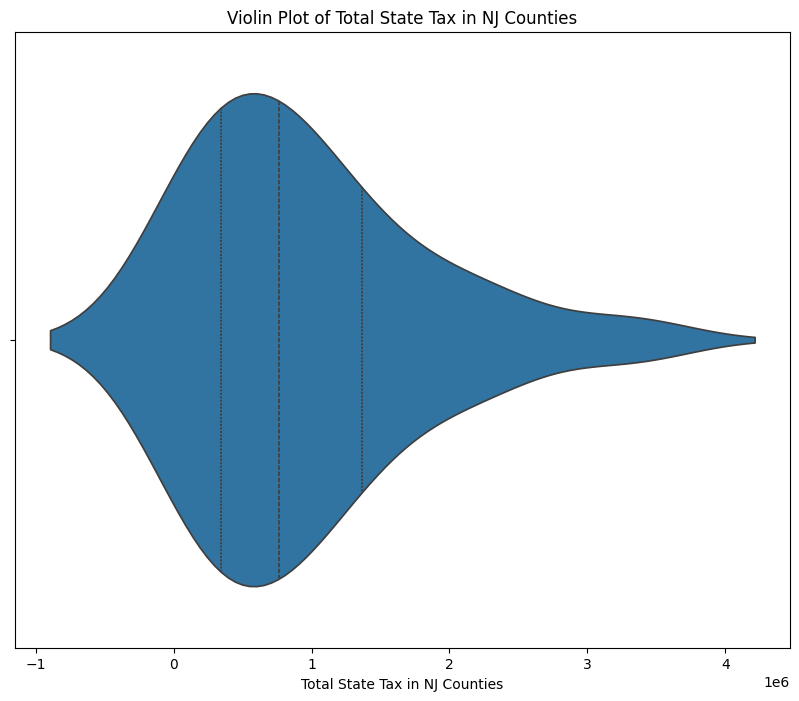

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=merge_df4['TOTAL_STATE/MUNI'], inner='quartile')
plt.xlabel('Total State Tax in NJ Counties')
plt.title('Violin Plot of Total State Tax in NJ Counties')
plt.show()

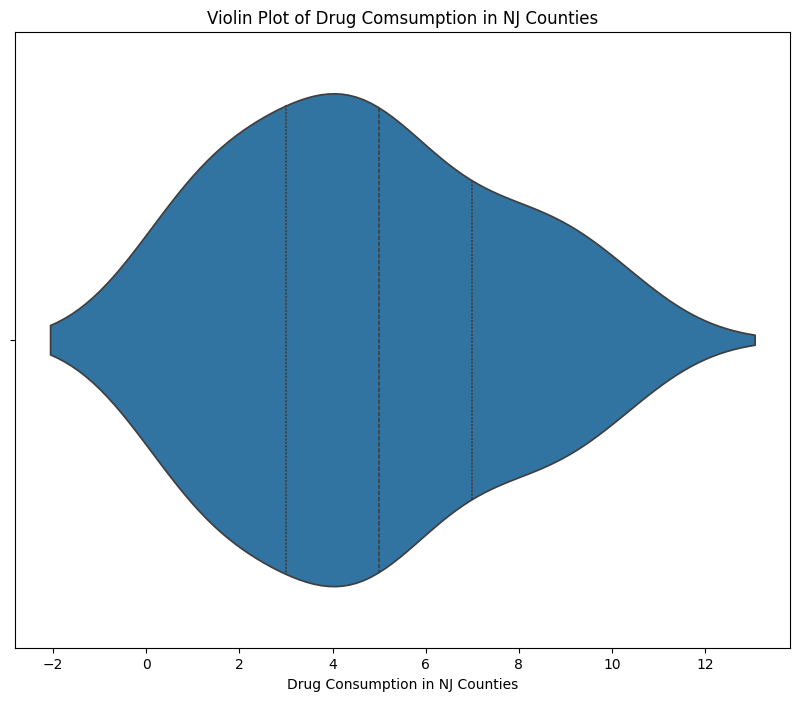

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=merge_df4['DRUG_TOTAL_CONSUMPTION'], inner='quartile')
plt.xlabel('Drug Consumption in NJ Counties')
plt.title('Violin Plot of Drug Comsumption in NJ Counties')
plt.show()

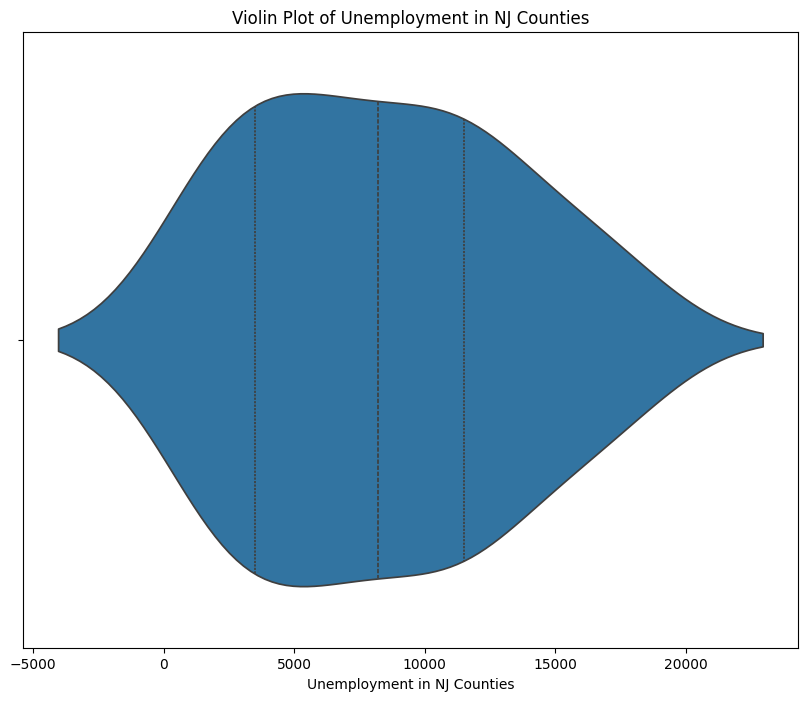

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=merge_df4['UNEMP'], inner='quartile')
plt.xlabel('Unemployment in NJ Counties')
plt.title('Violin Plot of Unemployment in NJ Counties')
plt.show()

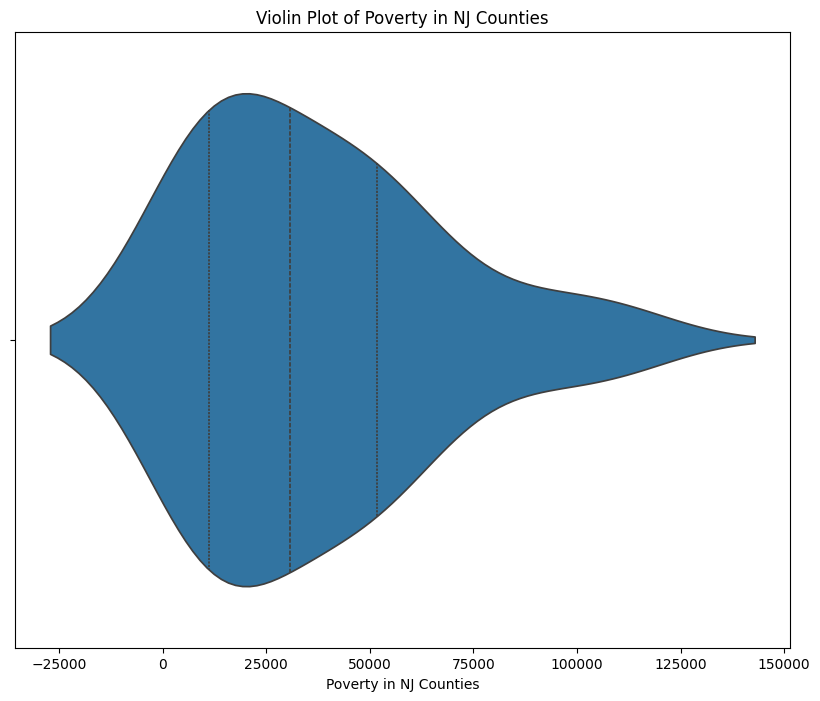

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=merge_df4['POVERTY'], inner='quartile')
plt.xlabel('Poverty in NJ Counties')
plt.title('Violin Plot of Poverty in NJ Counties')
plt.show()

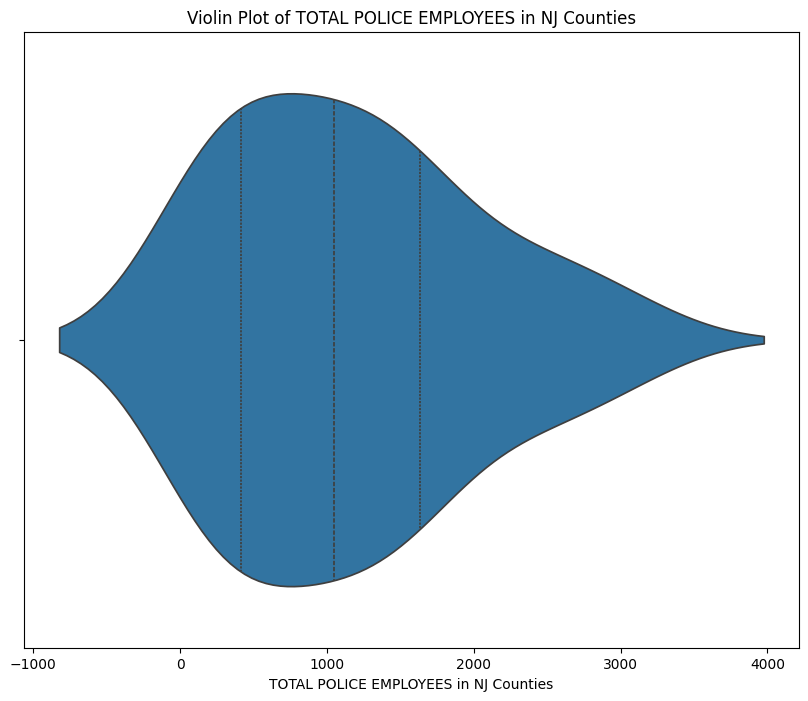

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=merge_df4['TOTAL POLICE EMPLOYEES'], inner='quartile')
plt.xlabel('TOTAL POLICE EMPLOYEES in NJ Counties')
plt.title('Violin Plot of TOTAL POLICE EMPLOYEES in NJ Counties')
plt.show()

####Boxplot

In [ ]:
fig = px.box(merge_df4, x='TOTAL POLICE EMPLOYEES', points="all", title='Box Plot of Total Police Employees in NJ Counties')
fig.update_layout(xaxis_title='Total Police Employees in NJ Counties')
fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)
fig.show()

In [ ]:
fig = px.box(merge_df4, x='TOTAL_STATE/MUNI', points="all", title='Box Plot of Total tax in NJ Counties')
fig.update_layout(xaxis_title='Total Tax in NJ Counties')
fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)
fig.show()

In [ ]:
fig = px.box(merge_df4, x='POVERTY', points="all", title='Box Plot of Poverty in NJ Counties')
fig.update_layout(xaxis_title='Total Tax in NJ Counties')
fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)
fig.show()

In [ ]:
fig = px.box(merge_df4, x='UNEMP', points="all", title='Box Plot of Unemployment in NJ Counties')
fig.update_layout(xaxis_title='Total Tax in NJ Counties')
fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)
fig.show()

In [ ]:
fig = px.box(merge_df4, x='DRUG_TOTAL_CONSUMPTION', points="all", title='Box Plot of Drug Consumption in NJ Counties')
fig.update_layout(xaxis_title='Total Tax in NJ Counties')
fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)
fig.show()

####Donut Chart

In [ ]:
total_drug_consumption = merge_df4['DRUG_TOTAL_CONSUMPTION'].sum()
merge_df4['Percentage of Total Consumption'] = merge_df4['DRUG_TOTAL_CONSUMPTION'] / total_drug_consumption * 100
fig = px.pie(merge_df4, values='Percentage of Total Consumption', names='COUNTY',
             title='Donut Chart of Drug Consumption in NJ Counties',
             hole=0.2)
fig.show()

In [ ]:
total_poverty = merge_df4['POVERTY'].sum()
merge_df4['Percentage of Total Poverty'] = merge_df4['POVERTY'] / total_poverty * 100
fig = px.pie(merge_df4, values='Percentage of Total Poverty', names='COUNTY',
             title='Donut Chart of Poverty in NJ Counties',
             hole=0.2)
fig.show()

In [ ]:
total_unemp = merge_df4['UNEMP'].sum()
merge_df4['Percentage of Total Unemployment'] = merge_df4['UNEMP'] / total_unemp * 100
fig = px.pie(merge_df4, values='Percentage of Total Unemployment', names='COUNTY',
             title='Donut Chart of Unemployment in NJ Counties',
             hole=0.2)
fig.show()

In [ ]:
total_tax = merge_df4['TOTAL_STATE/MUNI'].sum()
merge_df4['Percentage of Total Tax'] = merge_df4['TOTAL_STATE/MUNI'] / total_tax * 100
fig = px.pie(merge_df4, values='Percentage of Total Tax', names='COUNTY',
             title='Donut Chart of Tax in NJ Counties',
             hole=0.2)
fig.show()

In [ ]:
total_police = merge_df4['TOTAL POLICE EMPLOYEES'].sum()
merge_df4['Percentage of Total Police Employees'] = merge_df4['TOTAL POLICE EMPLOYEES'] / total_police * 100
fig = px.pie(merge_df4, values='Percentage of Total Police Employees', names='COUNTY',
             title='Donut Chart of Police Employees in NJ Counties',
             hole=0.2)
fig.show()